In [21]:
%pylab inline
import numpy as np
from sigvisa import Sigvisa
from sigvisa.models.ttime import tt_predict
from sigvisa.utils.geog import dist_km

Populating the interactive namespace from numpy and matplotlib


In [5]:
s = Sigvisa()
slon, slat, selev = s.earthmodel.site_info("MKAR", 0)[:3]
print slon, slat, selev


 82.2904 46.7937 0.6154


In [70]:
lons = np.linspace(0, 180, 500)
ds = [dist_km((slon, slat), (slon+l, slat)) for l in lons]
depth = 0
#tts = np.array([s.sigmodel.mean_travel_time(slon+l, slat, depth, 0, "MKAR", 3) for l in lons])

tts = np.zeros(lons.shape)
tts1 = np.zeros(lons.shape)
tts2 = np.zeros(lons.shape)
tts3 = np.zeros(lons.shape)

for i, l in enumerate(lons):
    try:
        tts[i] = s.sigmodel.mean_travel_time(slon+l, slat, depth, 0, "MKAR", 0)
    except:
        pass
    
    try:
        tts1[i] = s.sigmodel.mean_travel_time(slon+l, slat, depth, 0, "MKAR", 6)
    except:
        pass
    try:
        tts2[i] = s.sigmodel.mean_travel_time(slon+l, slat, depth, 0, "MKAR", 12)
    except:
        pass
    try:
        tts3[i] = s.sigmodel.mean_travel_time(slon+l, slat, depth, 0, "MKAR", 7)
    except:
        pass

(0, 12000)

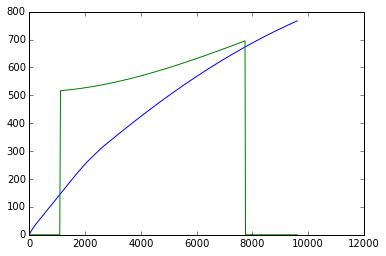

In [72]:
plt.plot(ds, tts)
plt.plot(ds, tts1)
#plt.plot(ds, tts3-tts)
#plt.ylim([-100, 100])
plt.xlim([0, 12000])